In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount ='True')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE= 16
IMAGE_SIZE = 512
CHANNELS=3
EPOCHS=20

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory ('/content/gdrive/MyDrive/Project/ProjectData/AllLeafs',
                                                               shuffle ='True',
                                                               image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                               batch_size = BATCH_SIZE
                                                               )

Found 209 files belonging to 3 classes.


In [ ]:
classes_names= dataset.class_names
classes_names

['Alternaria fungus leaf spot',
 'Bacterial blight (xanthomonas) on leaves',
 'healthy pomegranate leaves']

In [ ]:
len(dataset)

14

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)

(512, 512, 3)


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=7)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

11

In [ ]:
len(test_ds)

2

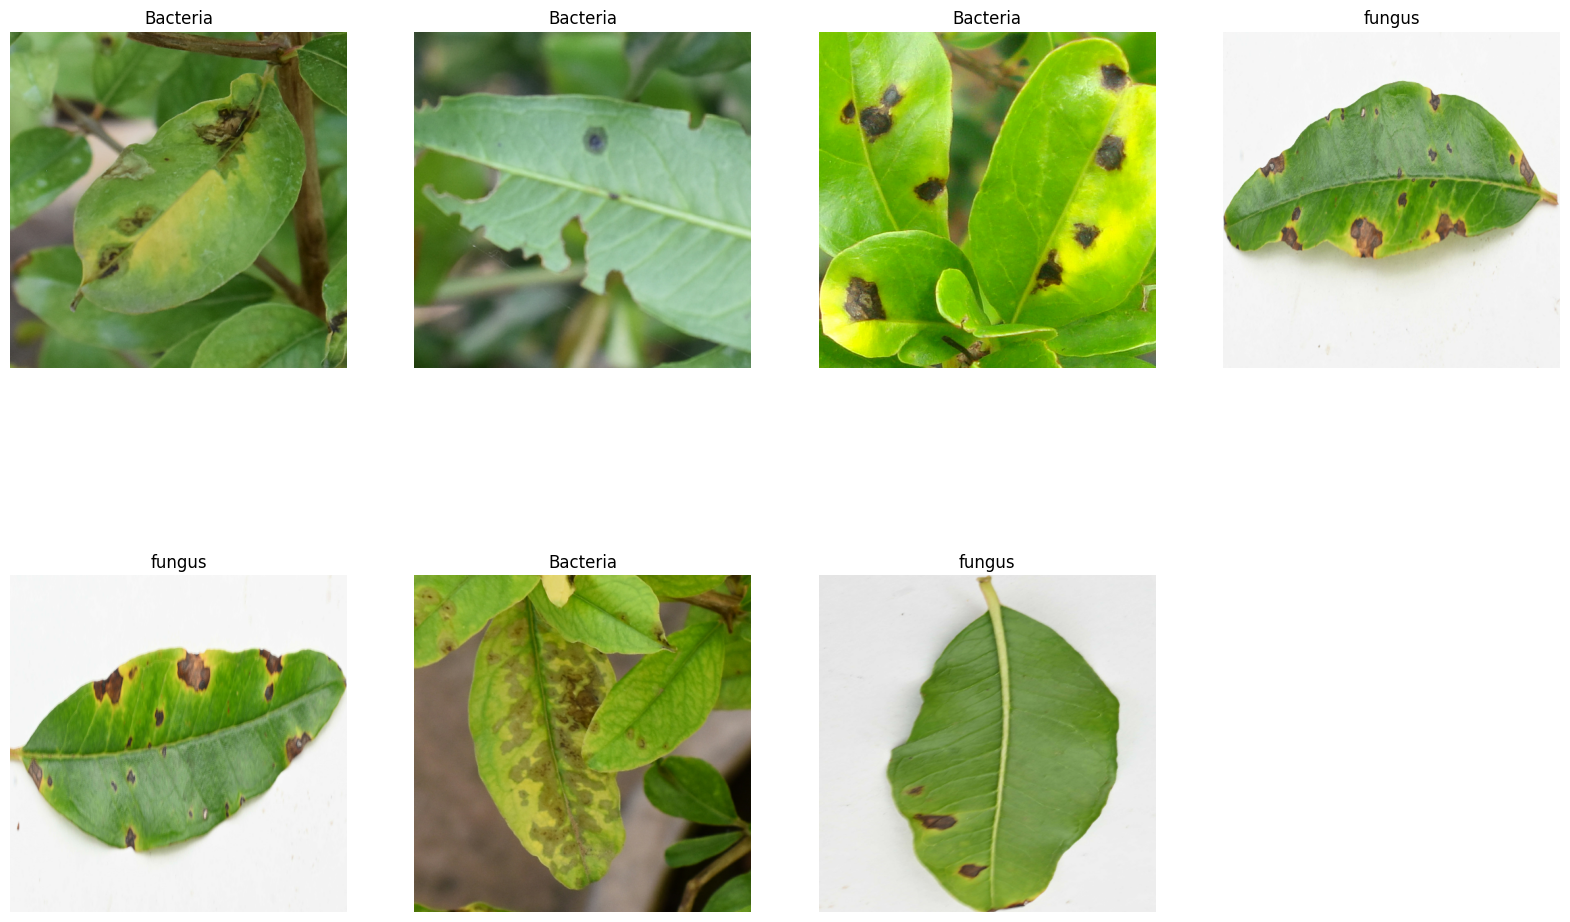

In [ ]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in test_ds.take(1):
    for i in range(7):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# **Data Aug**

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (16, 512, 512, 3)         0         
                                                                 
 sequential_4 (Sequential)   (16, 512, 512, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (16, 510, 510, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (16, 255, 255, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (16, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (16, 126, 126, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
11/11 [==============================] - 13s 592ms/step - loss: 1.0526 - accuracy: 0.4845 - val_loss: 1.3082 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 10s 628ms/step - loss: 0.9976 - accuracy: 0.5284 - val_loss: 1.0247 - val_accuracy: 0.3750
Epoch 3/20
11/11 [==============================] - 10s 492ms/step - loss: 0.9355 - accuracy: 0.5155 - val_loss: 0.8712 - val_accuracy: 0.5625
Epoch 4/20
11/11 [==============================] - 10s 599ms/step - loss: 0.7442 - accuracy: 0.6989 - val_loss: 0.3785 - val_accuracy: 0.9375
Epoch 5/20
11/11 [==============================] - 10s 620ms/step - loss: 0.2276 - accuracy: 0.9255 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 6/20
11/11 [==============================] - 10s 495ms/step - loss: 0.2426 - accuracy: 0.9068 - val_loss: 0.1493 - val_accuracy: 0.9375
Epoch 7/20
11/11 [==============================] - 12s 616ms/step - loss: 0.1152 - accuracy: 0.9503 - val_loss: 0.0532 - val_accuracy: 1.0000

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_ds)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


2/2 [==============================] - 4s 59ms/step - loss: 2.1057e-04 - accuracy: 1.0000
Test loss: 0.0002105679886881262
Test accuracy: 1.0


In [ ]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 4s 59ms/step - loss: 2.9537e-04 - accuracy: 1.0000


In [ ]:
scores

[0.0002953708462882787, 1.0]

In [ ]:
y_true = classes_names
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)

2/2 [==============================] - 4s 52ms/step


In [ ]:
classes_names

['Alternaria fungus leaf spot',
 'Bacterial blight (xanthomonas) on leaves',
 'healthy pomegranate leaves']

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

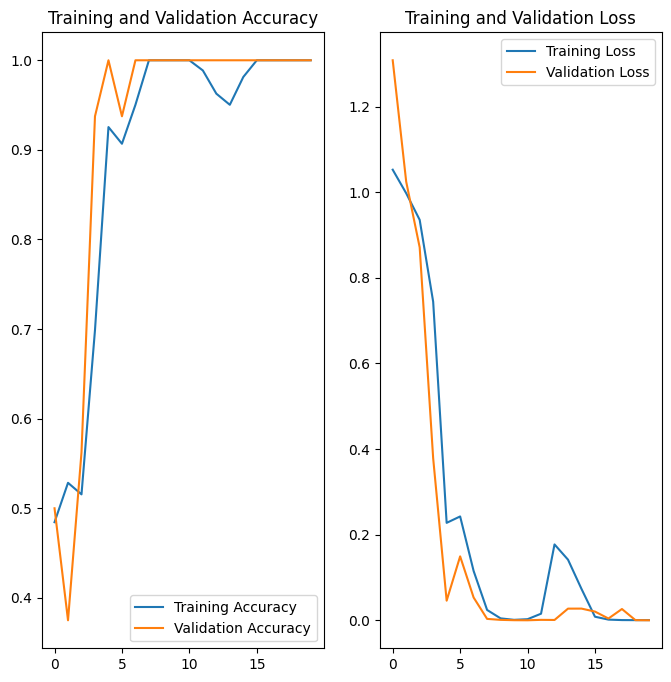

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Bacterial blight (xanthomonas) on leaves
1/1 [==============================] - 0s 103ms/step
predicted label: Bacterial blight (xanthomonas) on leaves


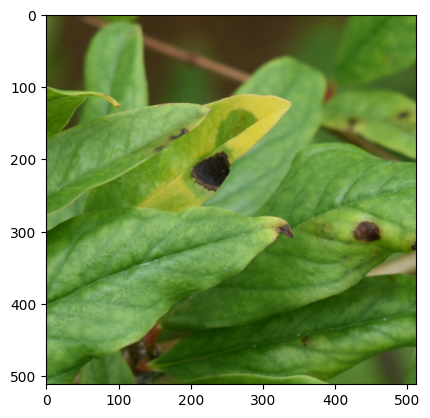

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes_names[np.argmax(batch_prediction[0])])